In [7]:
import numpy as np
import json

from collections import defaultdict
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

%matplotlib inline

In [18]:
from not_mnist_preprocess import load_not_mnist_data, remove_duplicates

In [370]:
labels, img_train, labels_train, img_test, labels_test = load_not_mnist_data()
img_train.shape

Loaded cached arrays


(529114, 28, 28)

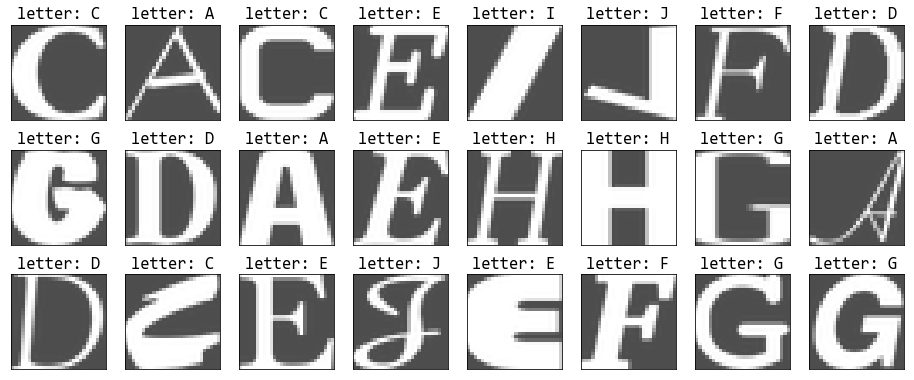

In [358]:
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'consolas'

rows = 3
cols = 8
fig = plt.figure(figsize=(16, 6.5))
for i in range(1, cols * rows + 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.set_xticks([])
    ax.set_yticks([])
    
    j = np.random.randint(0, labels_test.shape[0] - 1)
    ax.set_title(f"letter: {labels[labels_test[j]]}")
    plt.imshow(img_test[j], cmap='gray', alpha=0.7)

defaultdict(<class 'int'>, {'I': 52912, 'G': 52912, 'A': 52909, 'F': 52912, 'H': 52912, 'J': 52911, 'C': 52912, 'D': 52911, 'E': 52912, 'B': 52911})
defaultdict(<class 'int'>, {'I': 1872, 'G': 1872, 'A': 1872, 'F': 1872, 'H': 1872, 'J': 1872, 'C': 1873, 'D': 1873, 'E': 1873, 'B': 1873})


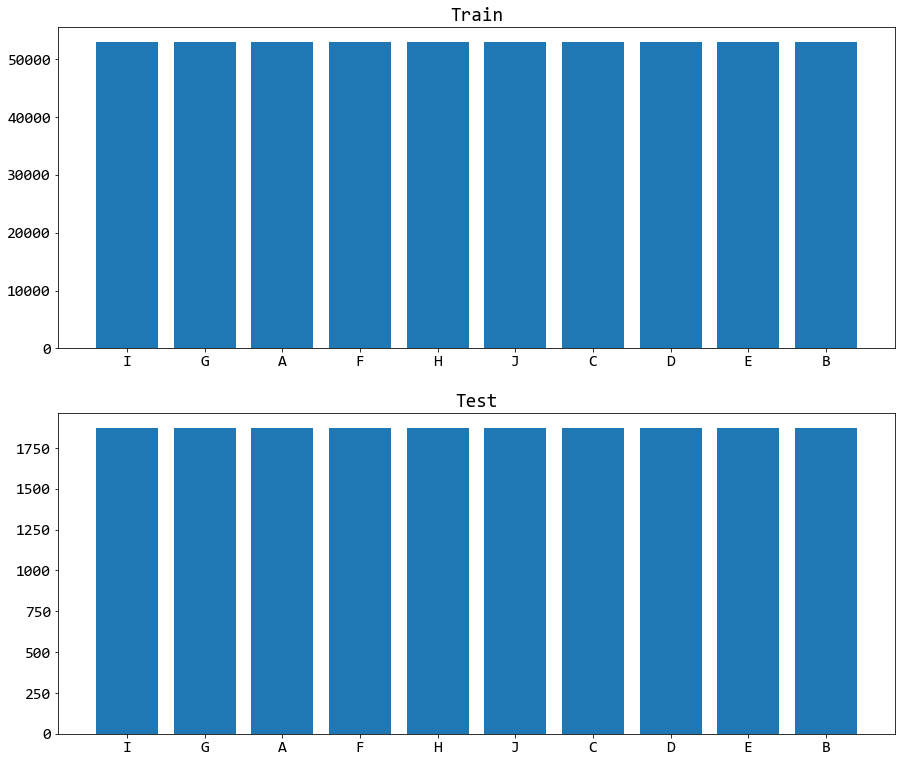

In [366]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'consolas'

def show_balance(title, ax, a, labels):
    counts = defaultdict(int)
    for e in a:
        counts[labels[e]] += 1
        
    print(counts)
        
    ax.bar(counts.keys(), counts.values())
    ax.set_title(title)
    
fig = plt.figure(figsize=(15, 13), )
show_balance("Train", fig.add_subplot(2, 1, 1), labels_train, labels)
show_balance("Test", fig.add_subplot(2, 1, 2), labels_test, labels)

In [367]:
img_train, labels_train = remove_duplicates(img_train, labels_train, img_test)

Removed 12213 duplicated images


defaultdict(<class 'int'>, {'I': 46651, 'G': 52276, 'A': 52322, 'F': 52266, 'H': 52132, 'J': 52236, 'C': 52213, 'D': 52241, 'E': 52290, 'B': 52274})
defaultdict(<class 'int'>, {'I': 1872, 'G': 1872, 'A': 1872, 'F': 1872, 'H': 1872, 'J': 1872, 'C': 1873, 'D': 1873, 'E': 1873, 'B': 1873})


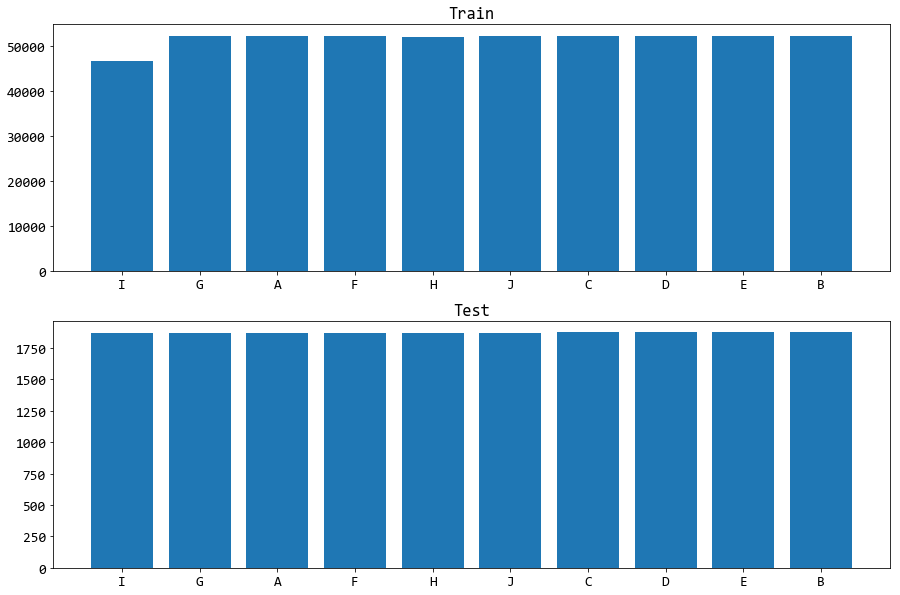

In [368]:
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'consolas'
    
fig = plt.figure(figsize=(15, 10), )
show_balance("Train", fig.add_subplot(2, 1, 1), labels_train, labels)
show_balance("Test", fig.add_subplot(2, 1, 2), labels_test, labels)

In [148]:
results = json.load(open('results/not_mnist_logistic_regression.json'))

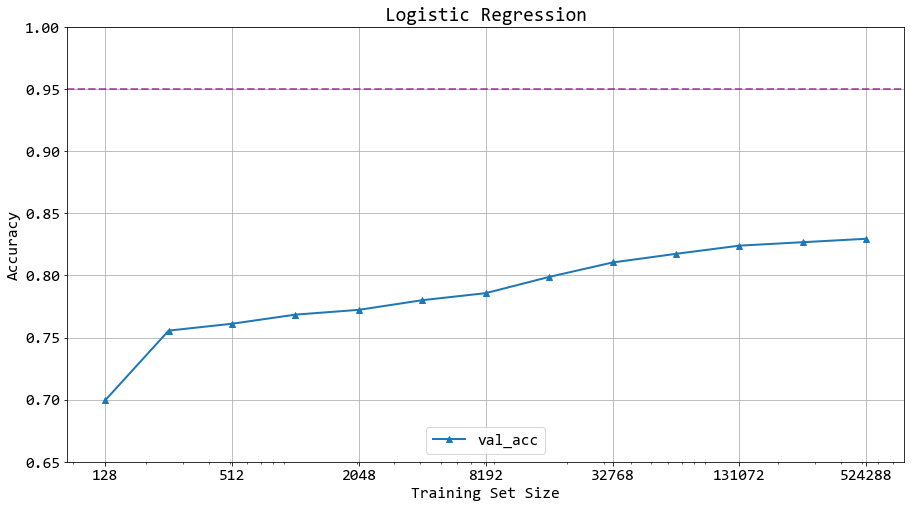

In [369]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 100
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set(xlabel='Training Set Size', ylabel='Accuracy')
ax.set_xscale('log')
ax.set_yticks(np.arange(0.5, 1.04, 0.05))
ax.set_ylim(0.65, 1)

ax.axhline(0.95, ls='--', color='purple', linewidth=2, alpha=0.6)
ax.plot(
    [int(v) for v in results["val_acc"].keys()], 
    results["val_acc"].values(), 
    '-{}'.format(marker),
    markersize=6,
    label=model_name, 
    linewidth=2
)
ax.set_xticks([int(v) for v in results["val_acc"].keys()][::2])
ax.set_xticklabels(list(results["val_acc"].keys())[::2])

ax.grid()
ax.set_title('Logistic Regression')
ax.legend(loc='lower center')

plt.show()

In [353]:
def plot_results(results, s=3):
    n = 2 * len(results.items())
    
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = "consolas"
    fig = plt.figure(figsize=(15, 8 * n))
    
    for i, (model_name, result) in enumerate(results.items()):
        ax = fig.add_subplot(n, 1, 2 * i + 1)
        ax.set_title(f"Loss: {model_name}")
        ax.set(xlabel='Epoch', ylabel='Loss')

        x = [int(n) for n, _ in enumerate(result['val_loss'])][1::]
        y1 = [v for v in result['loss']][1::]
        y2 = [v for v in result['val_loss']][1::]
        
        scale2 = int(np.ceil(len(x) / 20)) 

        ax.plot(x, y1, '-.', markersize=6, label='Train', linewidth=3)
        ax.plot(x, y2, '-', markersize=6, label='Validation', linewidth=3)
        ax.set_xticks(x[::scale2])
        ax.set_xticklabels(x[::scale2])

        ax.grid()
        ax.legend(loc='upper center')

        ax = fig.add_subplot(n, 1, 2 * i + 2)
        ax.set_title(f"Accuracy: {model_name}")
        ax.set(xlabel='Epoch', ylabel='Accuracy')
        ax.axhline(1, ls='--', color='purple', linewidth=2, alpha=0.5)

        x = [int(n) for n, _ in enumerate(result['categorical_accuracy'])][1::]
        y1 = [v for v in result['categorical_accuracy']][1::]
        y2 = [v for v in result['val_categorical_accuracy']][1::]

        ax.axhline(1, ls='--', color='brown', linewidth=2, alpha=0.5)
        ax.axhline(0.95, ls='--', color='purple', linewidth=2, alpha=0.5)
        
        ax.plot(x, y1, '-.', markersize=6, label="Train", linewidth=3)
        ax.plot(x, y2, '-', markersize=6, label="Validation", linewidth=3)
        ax.set_xticks(x[::scale2])
        ax.set_xticklabels(x[::scale2])

        ax.grid()
        ax.legend(loc='lower center')
        
    plt.show()

In [354]:
def plot_overall_results(results):
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = "consolas"
    fig = plt.figure(figsize=(15, 8 * 2))
    
    ax = fig.add_subplot(2, 1, 1)
    ax.set_title(f"Validation Loss")
    ax.set(xlabel='Epoch', ylabel='Loss')

    max_len = 0
    max_scale = 1
    max_x = []
    for i, (model_name, result) in enumerate(results.items()):
        x = [int(n) for n, _ in enumerate(result['val_loss'])][1::]  
        y = [v for v in result['val_loss']][1::]
        max_scale = max(max_scale, int(np.ceil(len(x) / 20))) 
        if len(x) > len(max_x):
            max_x = x
            max_len = len(x)
    
    for i, ((model_name, result), style) in enumerate(zip(results.items(), ["-", "-.", "--"])):
        x = [int(n) for n, _ in enumerate(result['val_loss'])][1::]  
        y = [v for v in result['val_loss']][1::]
#         y += [y[-1]] * (max_len - len(y))
        ax.plot(x, y, style, markersize=6, label=model_name, linewidth=3) 
        
    ax.set_xticks(max_x[::max_scale])
    ax.set_xticklabels(max_x[::max_scale])
    ax.grid()
    ax.legend(loc='upper center')

    ax = fig.add_subplot(2, 1, 2)
    ax.set_title(f"Validation Accuracy")
    ax.set(xlabel='Epoch', ylabel='Accuracy')
    ax.axhline(0.95, ls='--', color='purple', linewidth=2, alpha=0.5)
    
    for i, ((model_name, result), style) in enumerate(zip(results.items(), ["-", "-.", "--"])):
        x = [int(n) for n, _ in enumerate(result['val_loss'])][1::]  
        y = [v for v in result['val_categorical_accuracy']][1::]
#         y += [y[-1]] * (max_len - len(y))
        ax.plot(x, y, style, markersize=6, label=model_name, linewidth=3)

    ax.set_xticks(max_x[::max_scale])
    ax.set_xticklabels(max_x[::max_scale])
    ax.grid()
    ax.legend(loc='lower center')
        
    plt.show()

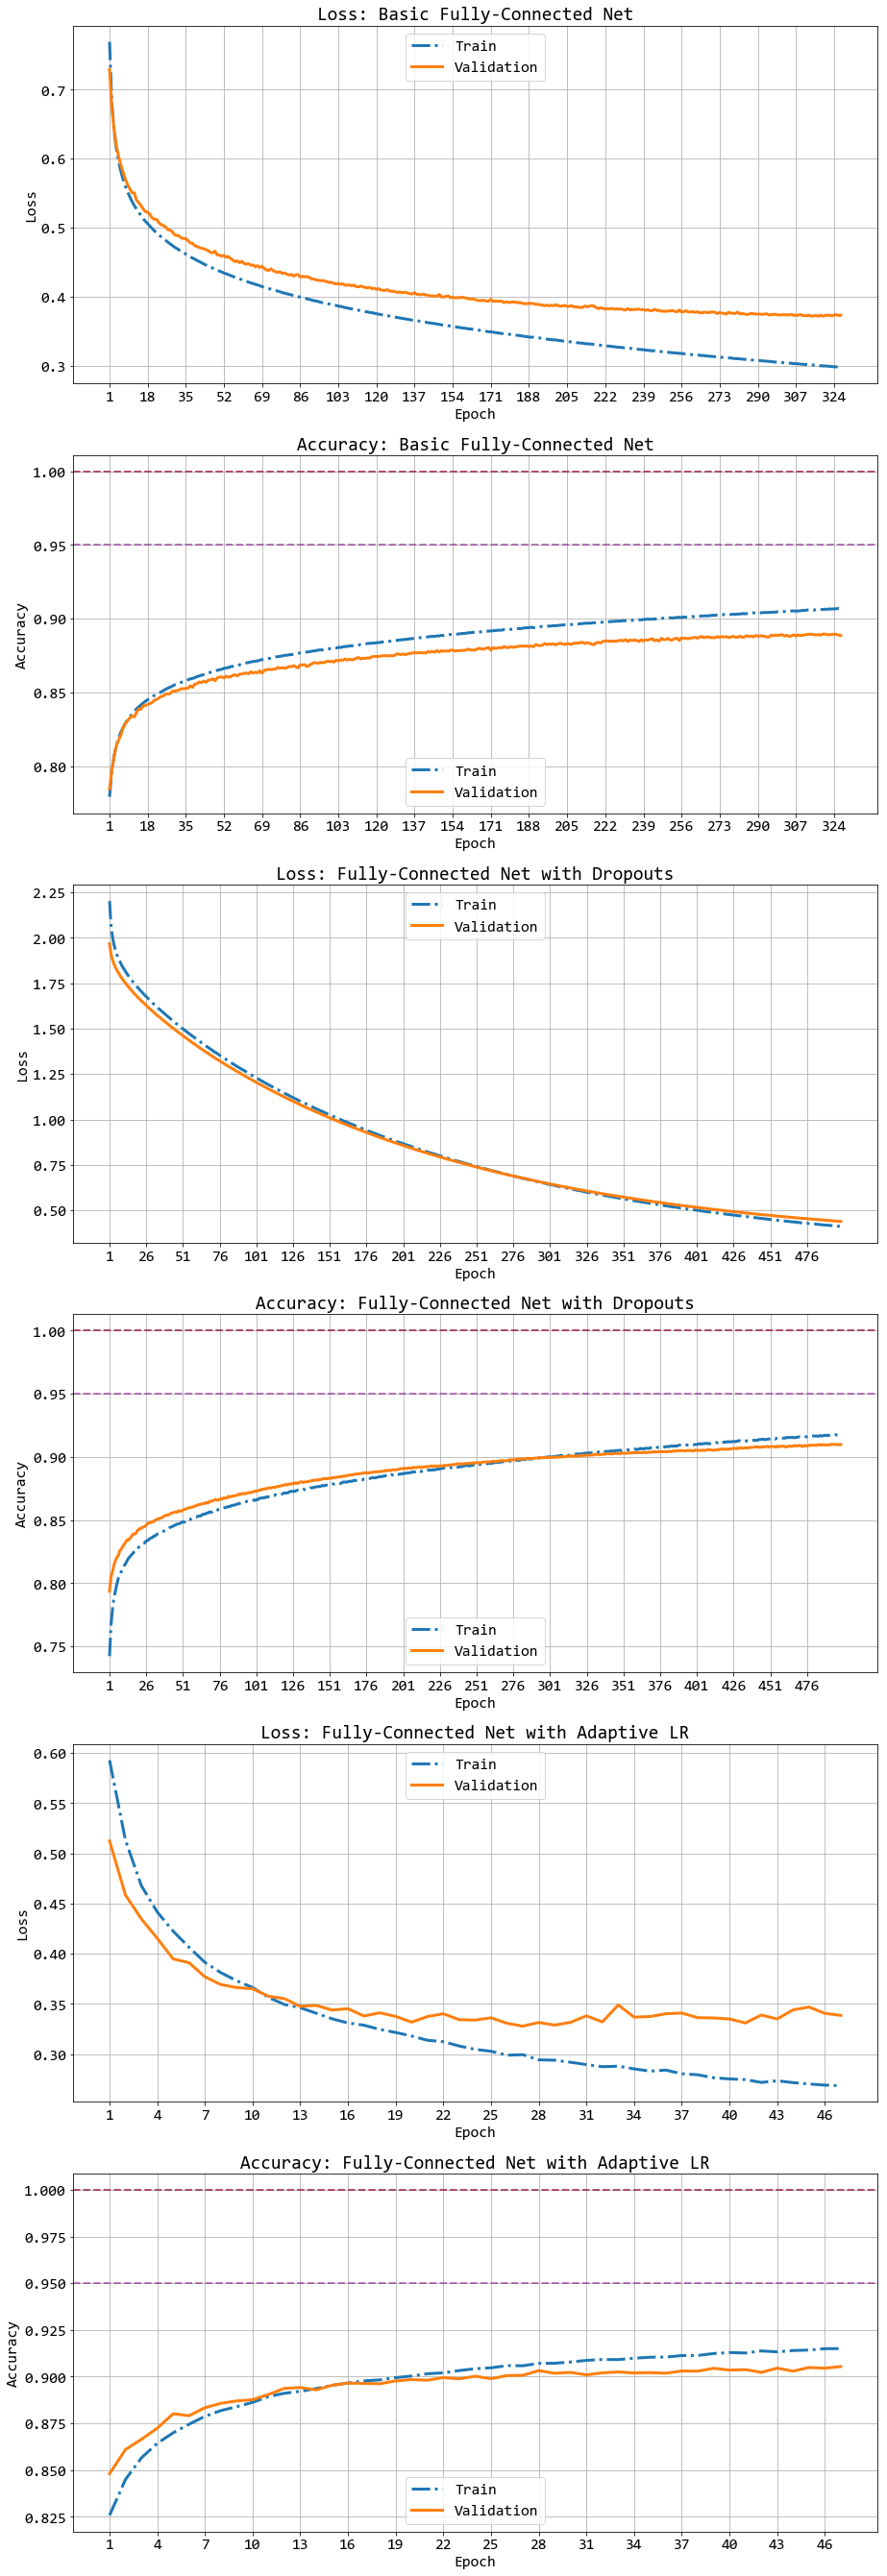

In [355]:
fc_nn_results = {
    "Basic Fully-Connected Net": json.load(open('results/not_mnist_fc_net_basic.json')),
    "Fully-Connected Net with Dropouts": json.load(open('results/not_mnist_fc_net_dropout.json')),
    "Fully-Connected Net with Adaptive LR": json.load(open('results/not_mnist_fc_net_adaptive_lr.json')),
}
plot_results(fc_nn_results)

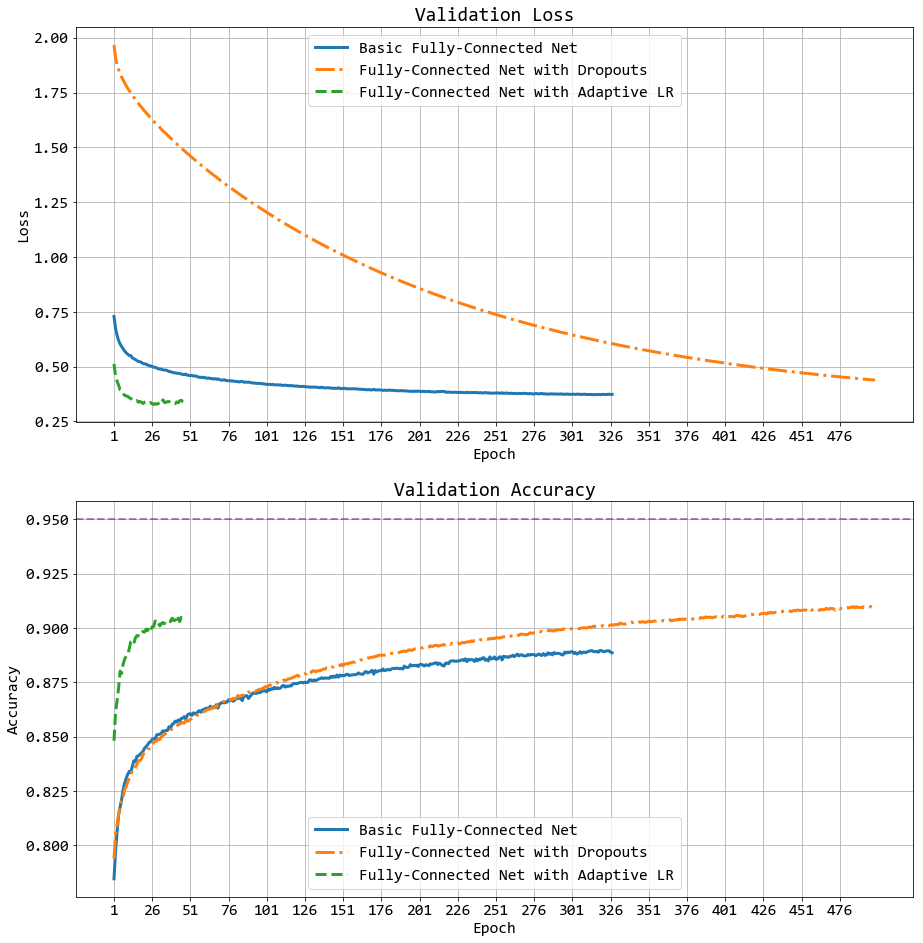

In [356]:
plot_overall_results(fc_nn_results)

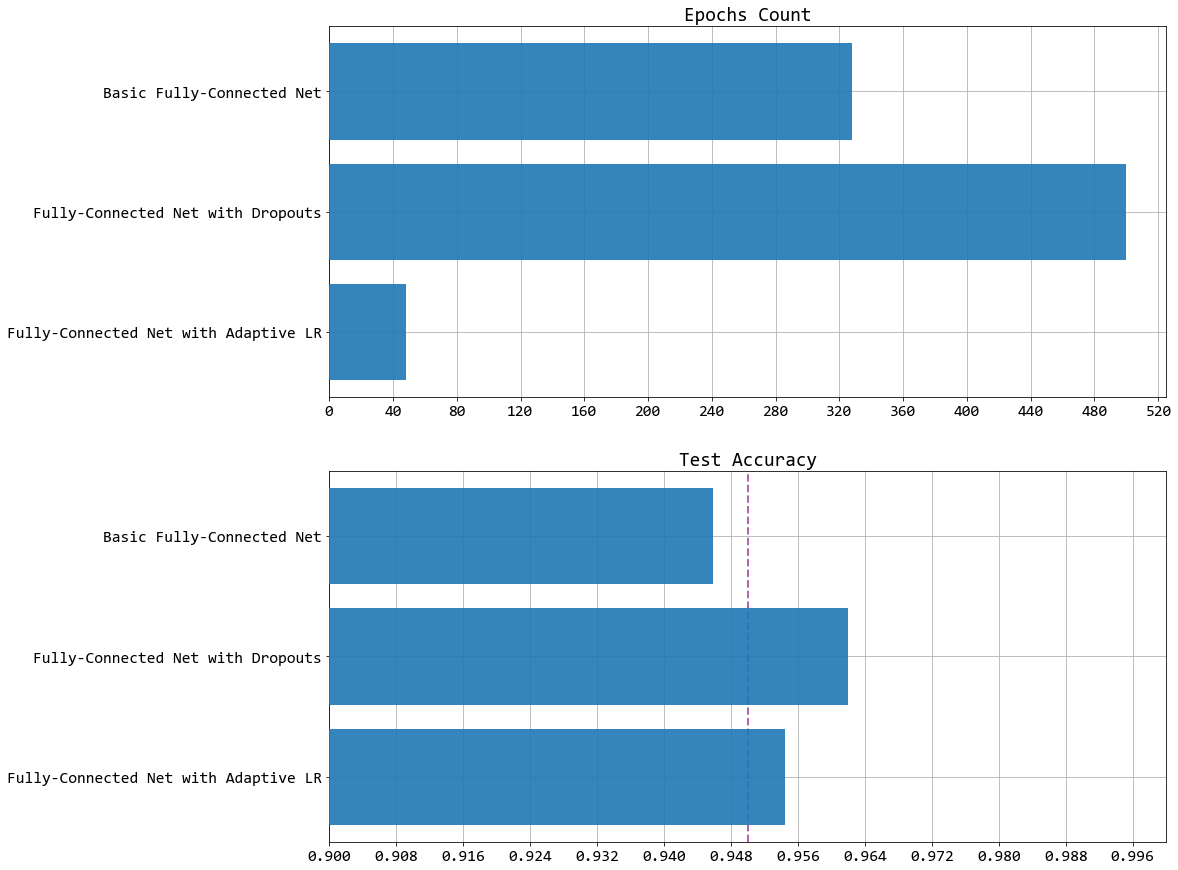

In [249]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "consolas"
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 1, 1)
ax.set_title(f"Epochs Count")
ax.set_xticks(np.arange(0, 540, 40))
ax.set_xlim(0, 525)
ax.grid(zorder=0)
ax.barh(
    [name for name in fc_nn_results.keys()][::-1], 
    [len(r['loss']) for r in fc_nn_results.values()][::-1],
    zorder=3,
    alpha=0.9
)

ax = fig.add_subplot(2, 1, 2)
ax.set_title(f"Test Accuracy")
ax.set_xticks(np.arange(0.9, 1.1, 0.008))
ax.set_xlim(0.9, 1)
ax.grid(zorder=0)
ax.axvline(0.95, ls='--', color='purple', linewidth=2, alpha=0.6)
ax.barh(
    [name for name in fc_nn_results.keys()][::-1], 
    [r['test_acc'] for r in fc_nn_results.values()][::-1],
    zorder=3,
    alpha=0.9
)

plt.show()

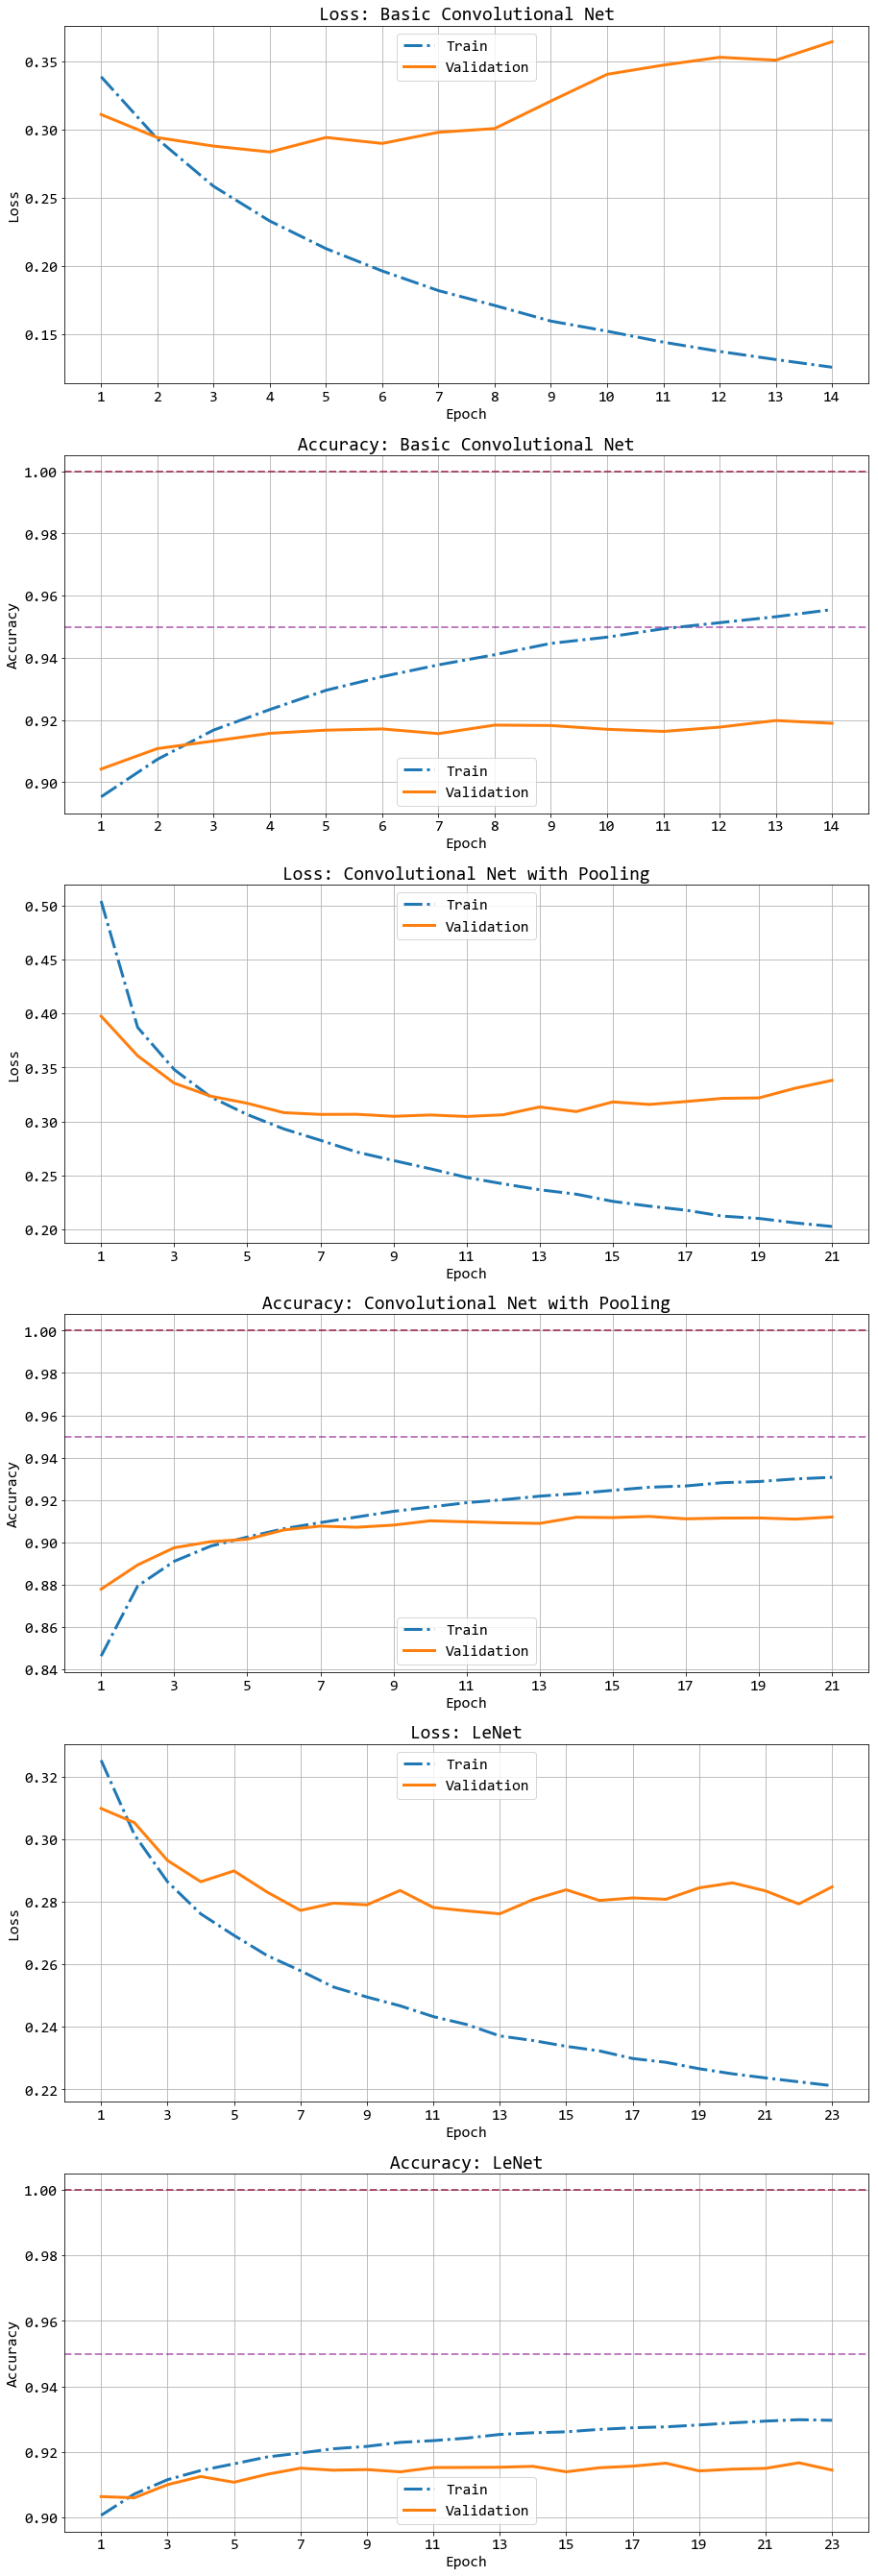

In [371]:
conv_nn_results = {
    "Basic Convolutional Net": json.load(open('results/not_mnist_conv_net_basic.json')),
    "Convolutional Net with Pooling": json.load(open('results/not_mnist_conv_net_pooling.json')),
    "LeNet": json.load(open('results/not_mnist_conv_net_lenet.json'))
}
plot_results(conv_nn_results)

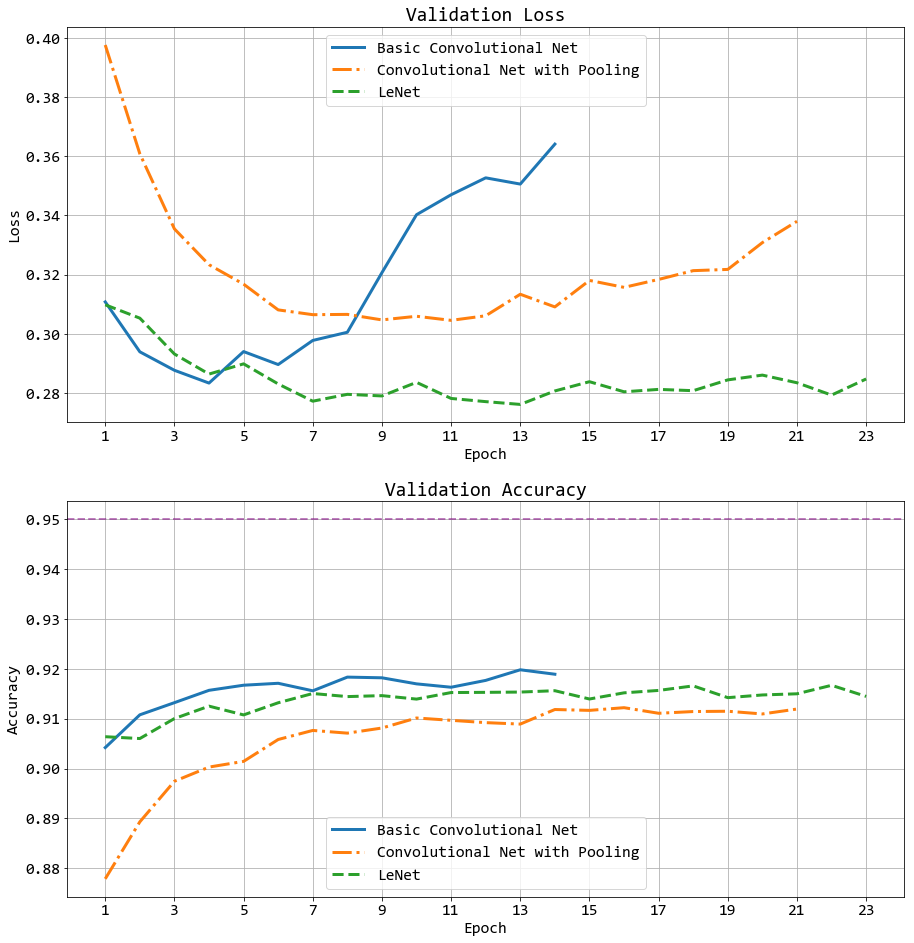

In [372]:
plot_overall_results(conv_nn_results)

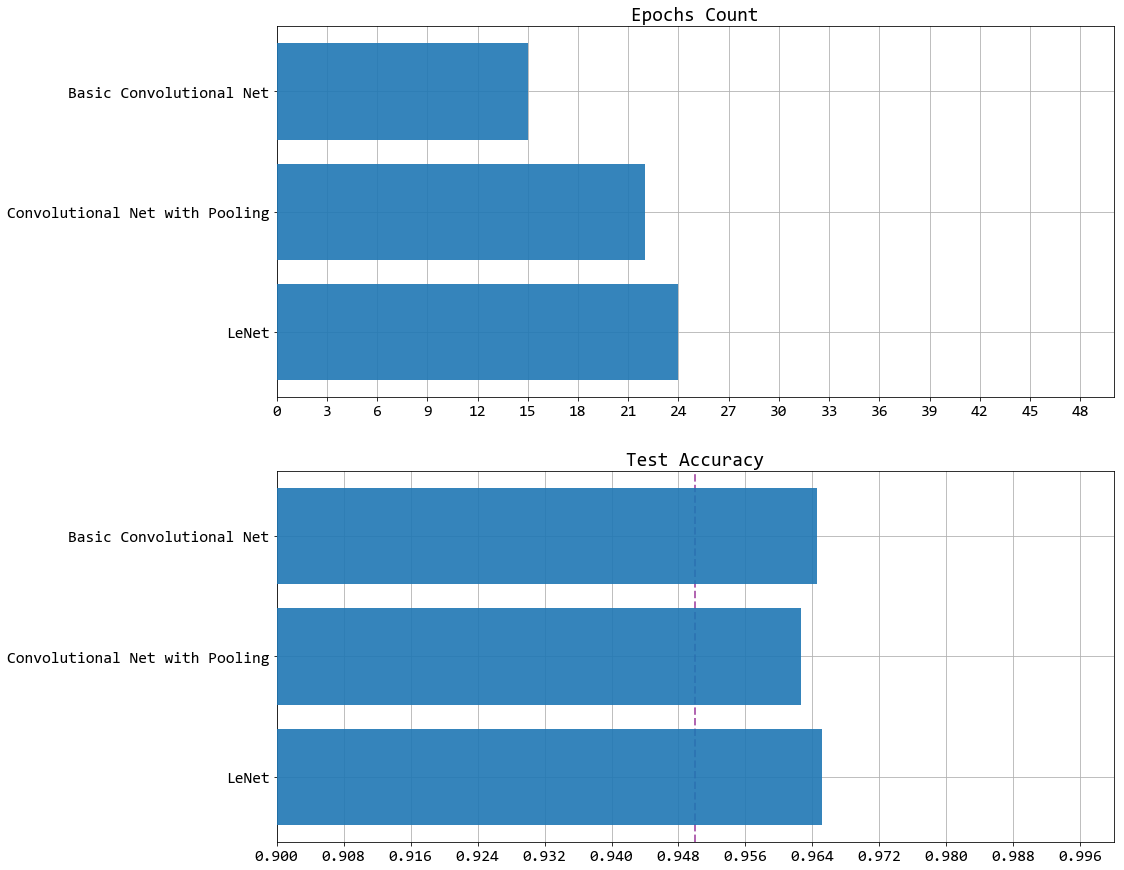

In [373]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "consolas"
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(2, 1, 1)
ax.set_title(f"Epochs Count")
ax.set_xticks(np.arange(0, 52, 3))
ax.set_xlim(0, 50)
ax.grid(zorder=0)
ax.barh(
    [name for name in conv_nn_results.keys()][::-1], 
    [len(r['loss']) for r in conv_nn_results.values()][::-1],
    zorder=3,
    alpha=0.9
)

ax = fig.add_subplot(2, 1, 2)
ax.set_title(f"Test Accuracy")
ax.set_xticks(np.arange(0.9, 1.1, 0.008))
ax.set_xlim(0.9, 1)
ax.grid(zorder=0)
ax.axvline(0.95, ls='--', color='purple', linewidth=2, alpha=0.6)
ax.barh(
    [name for name in conv_nn_results.keys()][::-1], 
    [r['test_acc'] for r in conv_nn_results.values()][::-1],
    zorder=3,
    alpha=0.9
)

plt.show()

In [374]:
total_results = {}
total_results['Logistic Regression'] = json.load(open('results/not_mnist_logistic_regression.json'))
total_results.update(fc_nn_results)
total_results.update(conv_nn_results)

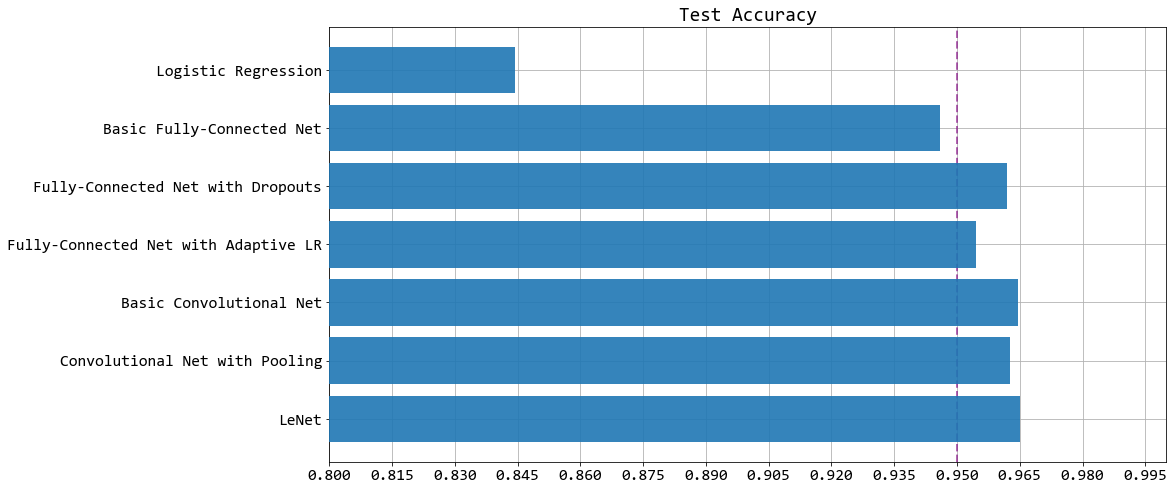

In [375]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = "consolas"
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_title(f"Test Accuracy")
ax.set_xticks(np.arange(0.8, 1.1, 0.015))
ax.set_xlim(0.8, 1)
ax.grid(zorder=0)
ax.axvline(0.95, ls='--', color='purple', linewidth=2, alpha=0.6)
ax.barh(
    [name for name in total_results.keys()][::-1], 
    [r['test_acc'] for r in total_results.values()][::-1],
    zorder=3,
    alpha=0.9
)

plt.show()

In [378]:
from svhn_preprocess import load_multiple_digits_data, load_single_digit_data

x_train, y_train, _, _, _, _ = load_single_digit_data()

OSError: Reader needs file name or open file-like object

NameError: name 'x_train' is not defined

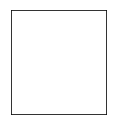

In [376]:
rows = 3
cols = 8
fig = plt.figure(figsize=(16, 6.5))
for i in range(1, cols * rows + 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.set_xticks([])
    ax.set_yticks([])
    
    j = np.random.randint(0, x_train.shape[0] - 1)
    ax.set_title(np.argmax(y_train[j]))
    plt.imshow(x_train[j].reshape((32, 32)))

In [54]:
x_train, y_train, _, _, _, _ = load_multiple_digits_data()

Loaded cached arrays for data/svhn/train
Loaded cached arrays for data/svhn/test


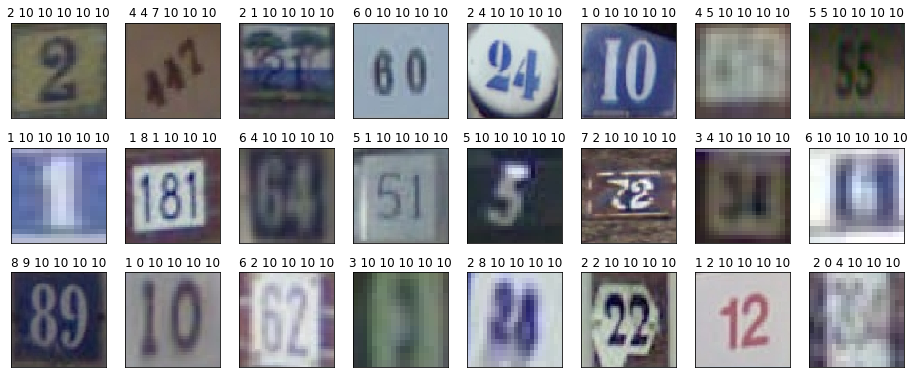

In [57]:
rows = 3
cols = 8
fig = plt.figure(figsize=(16, 6.5))
for i in range(1, cols * rows + 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.set_xticks([])
    ax.set_yticks([])
    
    j = np.random.randint(0, x_train.shape[0] - 1)
    label = ' '.join(str(np.argmax(d)) for d in y_train[j])
    ax.set_title(label)
    plt.imshow(x_train[j])

In [44]:
from svhn_multiple_mobile_net import to_y

In [58]:
from PIL import Image

In [64]:
Image.fromarray(x_train[32]).save('a.jpg')